#### 머신러닝 모델
- 수치형 데이터 예측 : 회귀모델 : 지도학습 : target 이 있음
- 범주형 데이터 예측 : 분류모델 : 지도학습 : target 이 있음
    - 나이브베이즈 : 텍스트 데이터 분류
    - SVM : 이미지, 음향
    - 디시전트리(랜덤포레스트) : 그외의 경우
- 군집분석 : 비지도학습 : target 이 없음

## 나이브 베이즈 : Naive Bayes
- 특성(feature)들 사이의 독립을 가정하는 베이즈 정리를 적용한 확률 분류기
- 'a feature와 b feature의 상관관계가 없다'

### Index
1. 조건부 확률
2. 베이즈 정리
3. 조건부 확률과 베이즈 정리의 관계
4. 테니스 데이터 예시
5. 나이브 베이즈 적용
6. 나이브 베이즈 종류
7. 평가 결과의 해석

### 1. 조건부 확률
- 사건 A가 발생했다는 조건에 사건 B가 발생할 확률
- 사건 A가 발생했을때 사건 B의 조건부 확률
- $P(B|A) = \frac{P(B \cap A)}{P(A)}$
- 특징
    - $P(B|A) \neq P(A|B)$
    - $P(A \cap B) = P(B)P(A|B) = P(A)P(B|A)$
    - $P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{P(A)P(B|A)}{P(B)}$
    - 사건 B가 발생했을때(사전확률) 사건 A가 발생할 확률(사후확률)을 사건 A가 발생했을때 사건 B가 발생할 확률로 알아낼수 있다.
    - $P(B|A)$ 로 $P(A|B)$ 를 알아낼수 있다.

#### 조건부 확률 예시

- A를 구매한 사람에게 B를 구매하라고 추천하는게 좋을까?
  - $P(A) = 0.7, P(B) = 0.6, P(A \cap B) = 0.5$
  - A를 구매한 사람이 B를 구매할 확률 : $P(B|A) = \frac{P(A \cap B)}{P(A)}$ = $\frac{0.5}{0.7} = 0.714$
  - B를 구매할 확률 : $P(B)=0.6$
  - 결론 : A를 구매하고 B를 구매하는것이 그냥 B를 구매하는 확률보다 높다. -> 추천하는것이 좋다!  
- A를 구매한 사람이 B를 구매할 확률로 B를 구매한사람이 A를 구매할 확률을 구할수 있다.    
  - B를 구매한사람이 A를 구매할 확률 : $P(A|B) = \frac{P(A)P(B|A)}{P(B)} = \frac{0.7*0.714}{0.6}=0.833$

### 2. 베이즈 정리
- 이전의 경험과 현재의 증거를 토대로 어떤 사건의 확률을 구하는 방법
- 조건부 확률을 이용하여 사전확률과 사후확률을 계산
- 사후확률로 사전확률을 예측 -> 결과로 원인의 추론이 가능
- A과거의 경험, B현재의 경험 -> 사건 B(사후확률)가 일어났을때 사건 A(사전확률)가 일어날 확률
- 베이즈 정리의 조건
  - $A_1, ..., A_k$: 배반사건 : 확률의 중복이 없음
  - $\cup_{i=1,...,k} A_i = S$: A의 합집합의 확률 1


prior -> 사전확률, posterior -> 사후확률

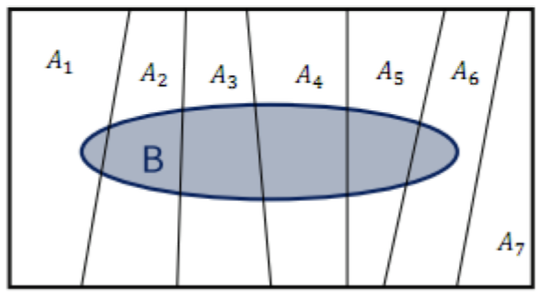

In [1]:
from IPython.display import Image
Image('imgs/naive_bayes_1.png')

- $B$가 주어졌을때 $A_i$일 확률
$$P(A_i|B)=\frac{P(A_i \cap B)}{P(B)}$$    

- $A$는 배반사건이므로 확률의 합집합은 +로 표현가능
- $P(B)$는 $P(A_1 \cap B) + ... + P(A_k \cap B)$로 표현가능
$$\Rightarrow \frac{P(A_i \cap B)}{P(A_1 \cap B) + ... + P(A_k \cap B)}$$


- 조건부 확률

$$ P(A \cap B) = P(B)P(A|B) = P(A)P(B|A)$$


- 최종 표현 수식

$$ \Rightarrow\frac{P(B|A_i)P(A_i)}{P(B|A_1)P(A_1)+...+P(B|A_k)P(A_k)}$$

#### 베이즈 정리 예시
- 1번 라인 : 불량 10%, 10000개 생산
- 2번 라인 : 불량 15%, 10000개 생산
- 문제 : 노트북을 꺼냈더니 불량이 나왔다(사후확률) 이 노트북이 1번 라인에서 조립되었을(사전확률) 확률은?


$$P(1|불량) = \frac{P(1 \cap 불량)}{P(불량)} = \frac{P(불량|1)P(1)}{P(불량)} = \frac{P(불량|1)P(1)}{P(불량|1)P(1) + P(불량|2)P(2)}$$


$$ = \frac{0.1}{0.1 + 0.15}=0.4 $$

### 3. 조건부 확률과 베이즈 정리의 관계

- A(사전확률), B(사후확률)

- 조건부 확률

$$P(B|A) = \frac{P(B \cap A)}{P(A)}$$


$$ P(A \cap B) = P(B)P(A|B) = P(A)P(B|A)$$


- 베이즈 정리 (조건부 확률을 정리가 베이즈 정리)


$$ P(A_i|B)=\frac{P(A_i \cap B)}{P(B)}=\frac{P(A_i)P(B|A_i)}{P(B)}$$



- $P(B)$ 를 모를 경우 조건부 확률을 사용해서 구할수 있음


$$ P(A_i|B)=\frac{P(A_i \cap B)}{P(B)}=\frac{P(B|A_i)P(A_i)}{P(B|A_1)P(A_1)+...+P(B|A_k)P(A_k)}$$

x들을 조건이라 생각하고 y를 맞추는 것이 나이브베이즈이다.

In [2]:
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### 4. 나이브 베이즈 예시

In [3]:
tennis = pd.read_csv("./data/play_tennis.csv")
tennis

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


- 조건부 확률
    - 날씨와 습도가 Rain, Normal 할때 테니스를 칠 확률
    
$$P(Yes|Rain,Normal)=\frac{P(Yes,Rain,Normal)}{P(Rain,Normal)}=\frac{\frac{2}{14}}{\frac{3}{14}}=\frac{2}{3}$$

In [4]:
# 날씨, 습도 : Rain, Normal : 3회
rain_normal = tennis[(tennis["outlook"] == "Rain") & (tennis["humidity"] == "Normal")]

# 날씨, 습도, 테니스 : Rain, Normal, Yes : 2회
rain_normal_yes = tennis[(tennis["outlook"] == "Rain") & (tennis["humidity"] == "Normal") & (tennis["play"] == "Yes")]

# Rain Normal, Rain Normal Yes, Total 
len(rain_normal), len(rain_normal_yes), len(tennis)

(3, 2, 14)

- 베이지안 정리
  - 테니스를 칠 확률 : $P(Yes)=\frac{9}{14}$
  - 테니스를 안칠 확률 : $P(No)=\frac{5}{14}$
  - 테니스를 쳤을때 Rain Normal할 확률 : $P(Rain, Normal|Yes)=\frac{2}{9}$
  - 테니스를 안쳤을때 Rain Normal할 확률 : $P(Rain, Normal|No)=\frac{1}{5}$
  - 테니스를 치고 Rain Normal할때 테니스를 칠 확률 : $P(Rain,Normal|Yes)P(Yes)=\frac{2}{9}*\frac{9}{14}=\frac{18}{126}$
  - 테니스를 안치고 Rain Normal할때 테니스를 안칠 확률 : $P(Rain,Normal|No)P(No)=\frac{1}{5}*\frac{5}{14}=\frac{1}{14}$
  - Rain Normal할 확률 : $P(Rain,Normal)=\frac{3}{14}$

- 날씨와 습도가 Rain, Nomal 할때 테니스를 칠 확률
    - 아래의 두가지로 표현이 가능
    
    - 조건부 확률

$$P(Yes|Rain,Normal)=\frac{P(Rain, Normal|Yes)P(Yes)}{P(Rain, Normal)}=\frac{\frac{18}{126}}{\frac{3}{14}}=\frac{6}{9}=\frac{2}{3}$$

    - 베이지안 정리

$$\frac{P(Rain,Normal|Yes)P(Yes)}{P(Rain,Normal|Yes)P(Yes)+P(Rain,Normal|No)P(No)}=\frac{\frac{18}{126}}{\frac{18}{126}+\frac{1}{14}(=\frac{9}{126})}=\frac{\frac{18}{126}}{\frac{27}{126}}=\frac{2}{3}$$

In [5]:
# 테니스를 칠 확률 : 9 / 14
yes = len(tennis[tennis["play"] == "Yes"]) / len(tennis)
len(tennis[tennis["play"] == "Yes"]), len(tennis), yes

(9, 14, 0.6428571428571429)

In [6]:
# 테니스를 쳤을때 Rain Normal할 확률 : 2 / 9
yes_rain_normal = len(tennis[(tennis["outlook"] == "Rain") & (tennis["humidity"] == "Normal") & (tennis["play"] == "Yes")])\
/ len(tennis[tennis["play"] == "Yes"])
len(tennis[(tennis["outlook"] == "Rain") & (tennis["humidity"] == "Normal") & (tennis["play"] == "Yes")])\
, len(tennis[tennis["play"] == "Yes"]), yes_rain_normal

(2, 9, 0.2222222222222222)

In [7]:
# 테니스를 안쳤을때 Rain Normal할 확률 : 1 / 5
no_rain_normal = len(tennis[(tennis["outlook"] == "Rain") & (tennis["humidity"] == "Normal") & (tennis["play"] == "No")])\
/ len(tennis[tennis["play"] == "No"])
len(tennis[(tennis["outlook"] == "Rain") & (tennis["humidity"] == "Normal") & (tennis["play"] == "No")])\
, len(tennis[tennis["play"] == "No"]), no_rain_normal

(1, 5, 0.2)

In [8]:
# 테니스를 치고 Rain Normal할때 테니스를 칠 확률  : (2 / 9) * (9 / 14)
yes_rain_normal * yes

0.14285714285714285

In [9]:
# Rain Normal할 확률 : 3 / 14
len(tennis[(tennis["outlook"] == "Rain") & (tennis["humidity"] == "Normal")]), len(tennis),\
len(tennis[(tennis["outlook"] == "Rain") & (tennis["humidity"] == "Normal")]) / len(tennis)

(3, 14, 0.21428571428571427)

### 5. 나이브베이즈 적용(Naive bayes)
- Naive : 모든 사건이 독립사건이라는 순진한(naive) 가정을 하고 있기 때문에 나이브베이즈라는 이름을 가지게 되었다.
- GaussianNB : 데이터가 정규분포를 따를때 사용

In [10]:
from sklearn.naive_bayes import GaussianNB

In [11]:
# 전처리
outlook = pd.get_dummies(tennis["outlook"]) # One-hot encoding
humidity = pd.get_dummies(tennis["humidity"])
feature = pd.concat([outlook, humidity], axis=1)
target = tennis["play"].map({'Yes': 0, 'No': 1})

In [12]:
tennis_df = pd.concat([feature, target], axis=1)
tennis_df.tail(2)

,Overcast,Rain,Sunny,High,Normal,play
12,1,0,0,0,1,0
13,0,1,0,1,0,1


In [13]:
# 모델 학습
model_1 = GaussianNB().fit(feature, target)

In [14]:
# 예측 데이터
pred_1 = model_1.predict(feature)

In [15]:
# 예측 데이터 
pred_1

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [16]:
# 실제 데이터
target.values

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [17]:
# 모델 평가 : 찍어도 50%인데 64.2% 성능이 안좋음
# 독립변수가 범주형 데이터 : BernoulliNB, MultinomialNB 을 사용하는것이 좋다.
len(pred_1[pred_1 == target.values]) / len(target)

0.6428571428571429

<AxesSubplot:ylabel='Density'>

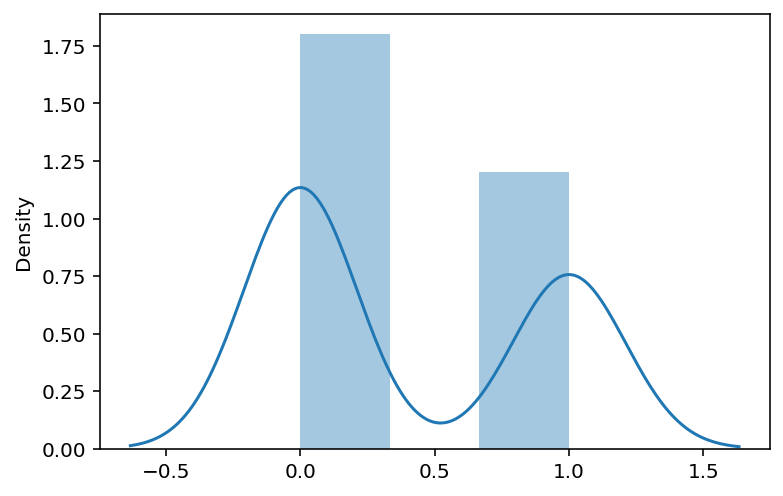

In [18]:
sns.distplot(feature) # 데이터가 정규분포가 아님 : 이산형 데이터(binary data)

### 6. 나이브 베이즈 종류
- GaussianNB : 정규분포
    - 독립변수가 연속적일때 사용
    - 독립변수가 정규분포일때 사용
- BernoulliNB : 베르누이분포
    - 독립변수가 범주형인경우 사용
    - 종속변수가 0 또는 1의 두가지를 갖는 이산형인 경우 사용
- MultinomialNB : 다항분포
    - 독립변수가 범주형인경우 사용
    - 종속변수가 여러개의 범주를 갖는 이산형인 경우 사용
<br><br>
- 베르누이 분포가 다항분포에 포함된다! (다항분포 > 베르누이 분포)<br><br>

- 각 클래스별로 데이터의 분포가 동일해야한다. <br>
    (0도 잘 맞추고 1도 잘 맞추는 모델(5:5)을 찾는 것이 목표, 따라서 데이터의 분포가 동일해야 좋은 학습이 가능!!)
    
- 방법 2가지 존재!
    - x 10000 y 100 라고 가정 -> binary classification 이면 down sampling 할 것 (강사님 선택)
    - 1. down sampling -> x 100 y 100 
    - 2. up sampling -> x 10000 y 10000 -> 100 * 100(정확한 분류를 할 수 있는지는 해봐야 알 수 있음!)

In [19]:
from sklearn.naive_bayes import MultinomialNB

In [20]:
# 모델 학습
model_2 = MultinomialNB().fit(feature, target)

In [21]:
# 예측
pred_2 = model_2.predict(feature)

In [22]:
# 평가 : GaussianNB 보다 성능이 좋다. : 독립변수가 정규분포가 아니기 때문에
len(pred_2[pred_2 == target.values]) / len(target)

0.8571428571428571

In [ ]:
# 데이터를 만들어서 예측
# 흐린날 습도가 보통일때 테니스를 칠까?
# Overcast, Rain, Sunny, High, Normal -> [1, 0, 0, 0, 1]

In [23]:
tennis_df.tail(1)

,Overcast,Rain,Sunny,High,Normal,play
13,0,1,0,1,0,1


In [24]:
sample = np.array([1, 0, 0, 0, 1])

In [25]:
# proba 어떤 class에 대해 확실하게 예측을 한 확률값을 뽑아내는 함수
proba = model_2.predict_proba([sample])[0] 
result = model_2.predict([sample])[0]
proba, result

(array([0.93054553, 0.06945447]), 0)

In [28]:
print("칠 확률: {}, 안 칠 확률: {},".format(np.round(proba[0], 2), np.round(proba[1], 2)), end=" ")
print("결과 : {}".format( "테니스 안친다." if result else "테니스 친다."))

칠 확률: 0.93, 안 칠 확률: 0.07, 결과 : 테니스 친다.


### 7. 평가 결과의 해석

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

- TP : True Positive : 테니스를 안치는 데이터에서 테니스를 안친다고 예측 : 8 
- TN : True Nagative : 테니스를 치는 데이터에서 테니스를 친다고 예측 : 4
- FP : False Positive : 테니스를 안치는 데이터에서 테니스를 친다고 예측 : 1
- FN : False Nagative : 테니스를 치는 데이터에서 테니스를 안친다고 예측 : 1
- 확인!!!!!!!!!!!!!!!!!!!!

In [32]:
print(target.values)
print(pred_2)

[1 1 0 0 0 1 0 1 0 0 0 0 0 1]
[1 1 0 1 0 0 0 1 0 0 0 0 0 1]


In [33]:
cm = confusion_matrix(target.values, pred_2)
# 구글에 있는 이미지대로 array가 나오는 것이 맞음!
# tp fp
# fn tn
cm

# tp=8 fp=1
# fn=1 tn=4

array([[8, 1],
       [1, 4]], dtype=int64)

In [31]:
print(classification_report(target.values, pred_2))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.80      0.80      0.80         5

    accuracy                           0.86        14
   macro avg       0.84      0.84      0.84        14
weighted avg       0.86      0.86      0.86        14



- 정확도(accuracy)
    - 전체 샘플 중 맞게 예측한 샘플 수의 비율을 뜻한다. 높을수록 좋은 모형이다.
    - 12 / 14 = 0.86

$$ \text{accuracy} = \dfrac{TP + TN}{TP + TN + FP + FN} $$

- 정밀도(precision)
    - 예측 데이터를 기준으로 예측된 데이터를 맞춘 비율 : 세로로 연산
    - 0 : 8 / 9 = 0.89
    - 1 : 4 / 5 = 0.80

In [ ]:
cm

$$\text{precision} = \dfrac{TP}{TP + FP}$$

- 재현율(recall)
    - 실제 데이터룰 기준으로 예측된 데이터가 맞은 비율 : 가로로 연산
    - 0 : 0.89
    - 1 : 0.80

In [ ]:
cm

$$\text{recall} = \dfrac{TP}{TP + FN}$$

- F점수(F-score)
    - 정밀도와 재현율의 가중조화평균(weight harmonic average)을 F점수(F-score)라고 한다. 정밀도에 주어지는 가중치를 베타(beta)라고 한다.
    - 베타가 1인 경우를 특별히 F1점수라고 한다.

$$
F_\beta = (1 + \beta^2) \, ({\text{precision} \times \text{recall}}) \, / \, ({\beta^2 \, \text{precision} + \text{recall}})
$$

    

$$
F_1 = 2 \cdot \text{precision} \cdot \text{recall} \, / \, (\text{precision} + \text{recall})
$$

- accuracy: 정확도. 전체 학습데이터의 개수에서 각 클래스에서 자신의 클래스를 정확하게 맞춘 개수의 비율
- macro: 단순평균
- weighted: 각 클래스에 속하는 표본의 갯수로 가중평균

F점수가 높은것이 가장 좋으나 모델링이 힘들 수 있음<br> 따라서 percision, recall 중 더 중점적으로 생각하는 걸 토대로 모델링을 진행하게 된다.